# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv ("datasets/Grains.csv")

df.sample(3)

,A,P,C,LK,WK,A_Coef,LKG,target
90,20.10,16.99,0.8746,6.581,3.785,1.955,6.449,1
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,0
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,2


* Target ( 3 types of grains , based on size )
    * 2 - small - indian
    * 0 - medium - abba
    * 1 - large - massa

<a id='section_21'></a>
# **1 - Data Wrangling**

## **1.1 - Feature Selection via SelectKBest**

In [3]:
X  =  df.drop('target',axis=1)                                    
Y  =  df ['target']

In [4]:
from   sklearn.feature_selection   import   SelectKBest , f_classif

skb = SelectKBest ( f_classif , k=7 )                              #  k = num of features in the current dataset

skb.fit_transform (X,Y)

skb.pvalues_

array([1.96480607e-83, 5.64099889e-83, 1.92069993e-25, 2.72636256e-64,
       2.13926525e-72, 5.42732510e-19, 5.62977594e-69])

#### **Inference**
* All are good predictors

## **1.2 - Drop**

* Dropping target column for clustering perspective

In [5]:
df.drop ( 'target' , axis=1 , inplace =True )                     

## **1.3 - Transform**

In [6]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [7]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns = df.columns )

df.sample(3)

,A,P,C,LK,WK,A_Coef,LKG
9,0.664026,0.639070,0.695267,0.704527,0.682803,-1.198621,0.424771
145,-1.420127,-1.172701,-1.969947,-0.772650,-1.592843,1.533279,-0.124037
114,1.762450,1.760819,0.588859,1.765679,1.825930,0.700101,1.608645


<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

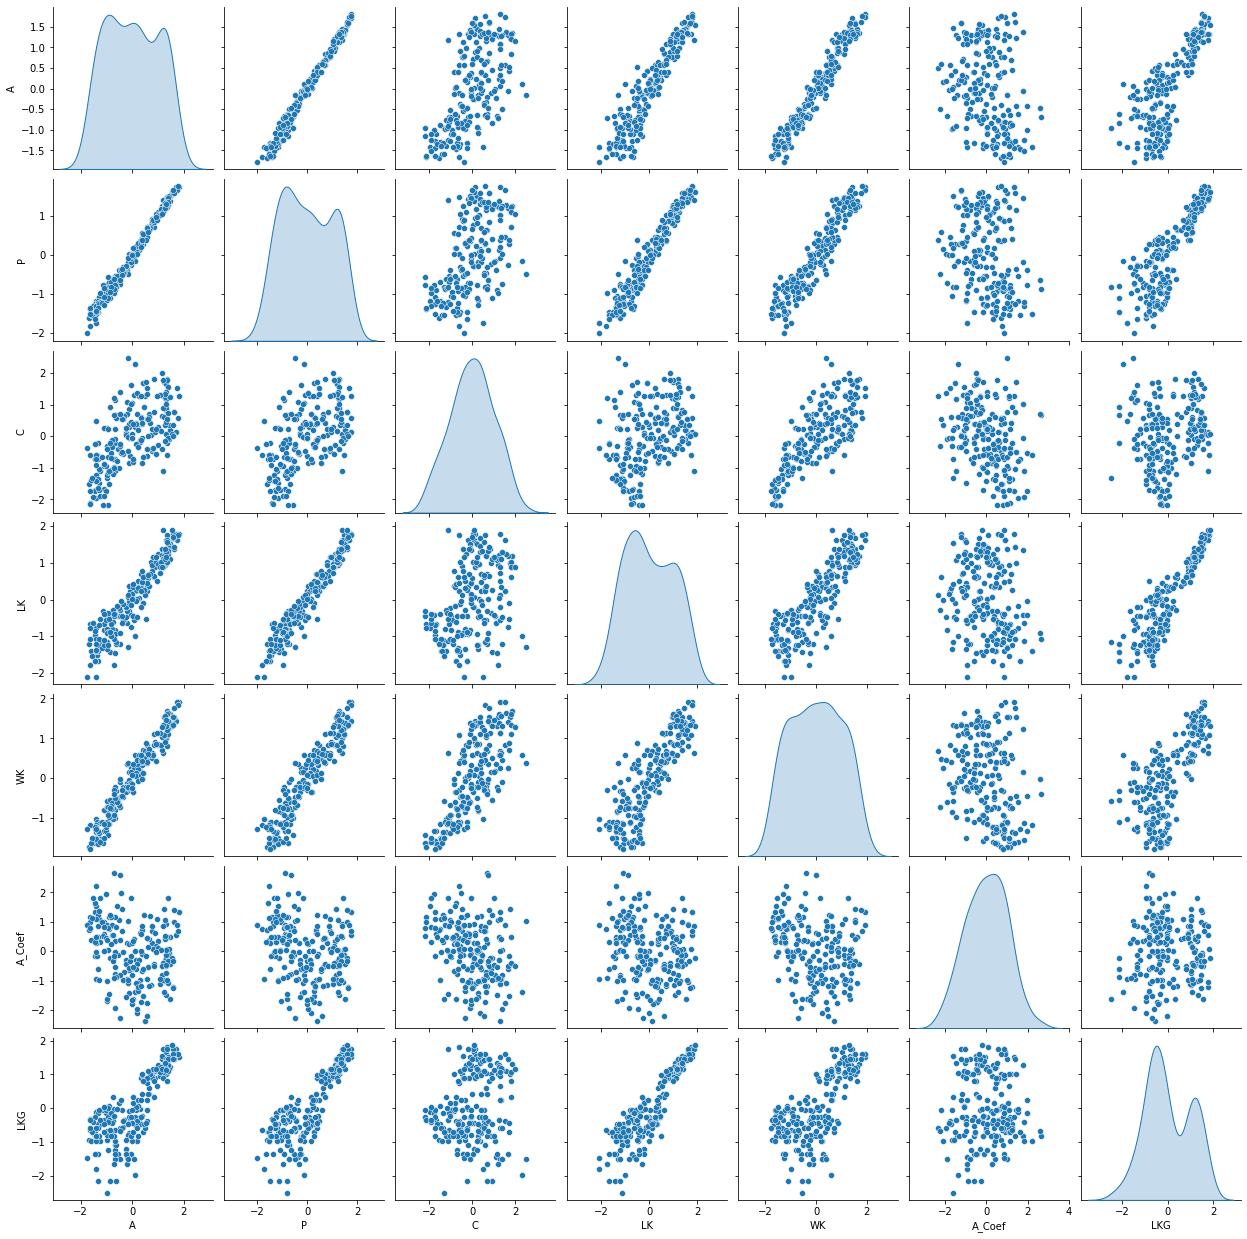

In [8]:
sns.pairplot ( df , diag_kind ='kde' ) ;

#### **Inference**
* Range of K = 2 to 7

### **2.1.2 - Elbow Plot**

In [9]:
from sklearn.cluster import KMeans

In [10]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [12]:
from   sklearn.metrics   import   silhouette_score

In [13]:
scores =[]

for k in range(2,7):                                                               

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels)
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [14]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0)    .head()    .style.hide_index()

k,Avg Silhouette Score
2,0.442910
3,0.402888
4,0.330456
5,0.308427
6,0.270071


### **2.1.4 - Dendrogram**

In [15]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

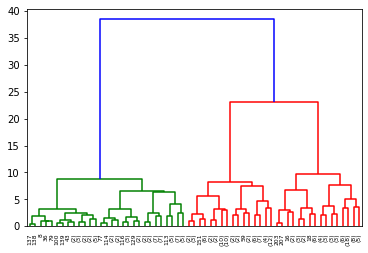

In [16]:
model  =  AgglomerativeClustering  ( affinity ='euclidean' ,  linkage ='ward' )

model.fit (df)

Z = linkage (df, 'ward')

dendrogram ( Z  ,  p=5  ,  truncate_mode='level')                                                   

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2 , 3 |         
| Silhouette | 2 , 3 |
| Dendrogram | 2 , 3|

In [17]:
KM    =  KMeans ( n_clusters=3 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [18]:
labels        =  KM.predict (df)                                   

df["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

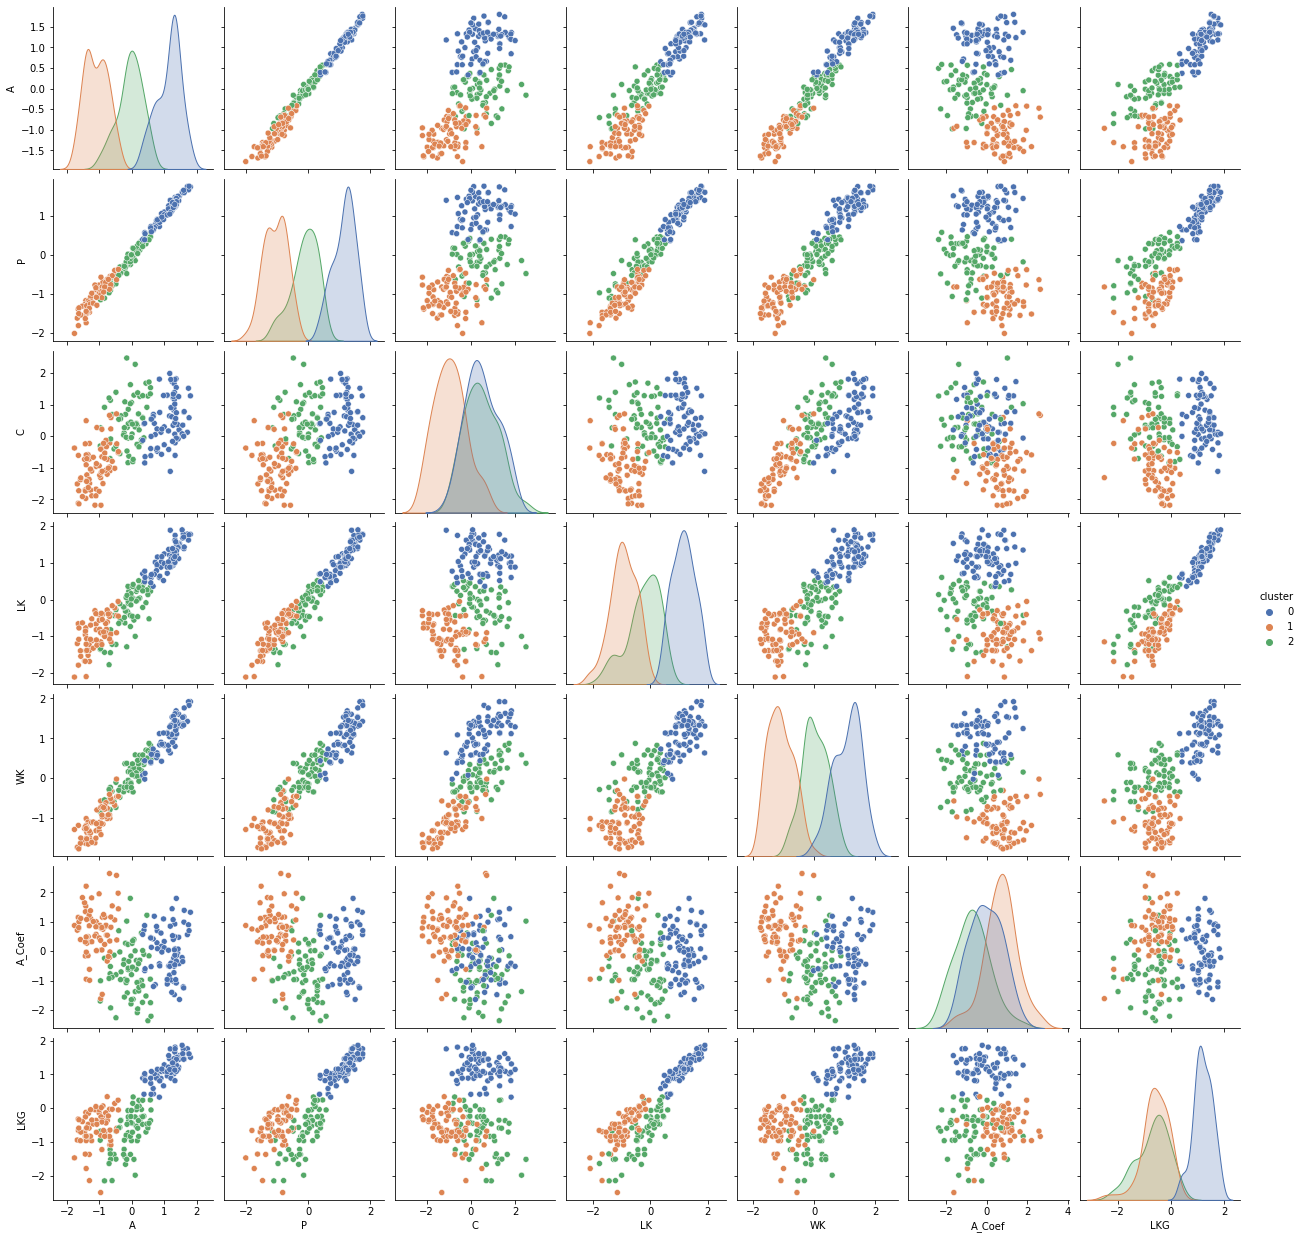

In [19]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster' , palette='deep') ;

### **2.4.2 - Boxplot**

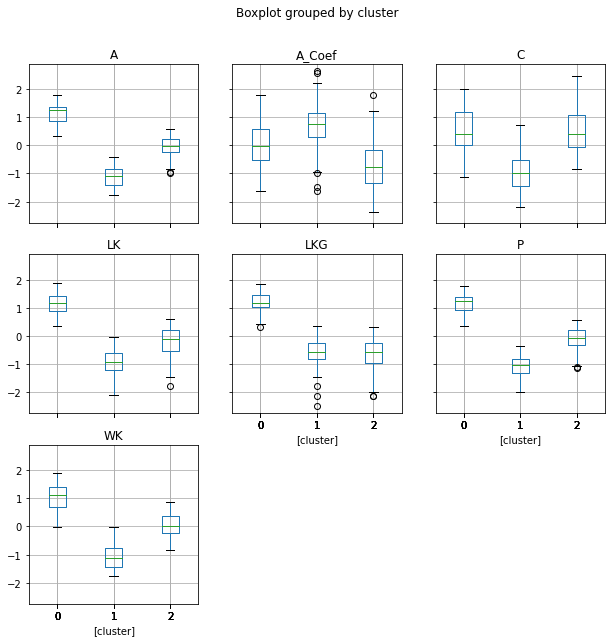

In [20]:
df.boxplot (by='cluster', figsize=(10,10))

plt.show()

### **2.4.3 Scatterplot**

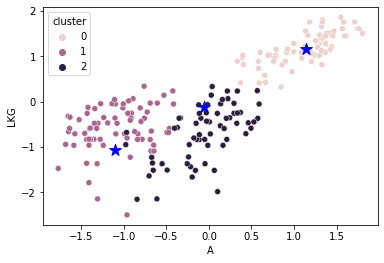

In [23]:
sns.scatterplot ( x='A' ,  y='LKG'  ,  hue = 'cluster' , data=df )  

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='blue' , marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Size | Name |
| ---    | ---    | --- |
| 0  | large  | Messa |         
| 1 | small  | Indian |
| 2 | medium  | Abba |